# **Proyek Analisis Data: Bike-Sharing** 🚴

---


- **Nama:** Dzakiyyah Afifah Rahma
- **Email:** punyakiyasaja@gmail.com
- **ID Dicoding:** afifahrahma

# **Pengenalan Proyek**

---

## **Latar Belakang**

Sistem Bike Sharing adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian sepeda menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat **lebih dari 500 program** Bike Sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem Bike Sharing, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem Bike Sharing menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.


## **Data Set**
Proses penyewaan Bike Sharing ini sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis dua tahun yang berkaitan dengan tahun 2011 dan 2012 dari sistem **Capital Bikeshare, Washington D.C., Amerika Serikat** yang
tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data tersebut dalam dua basis per jam dan per hari kemudian
diekstrak dan ditambahkan informasi cuaca dan musim yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

### **File**


* **Readme.txt**
* **hour.csv** : jumlah penggunaan sepeda setiap jam. Records: 17379 jam
* **day.csv** : jumlah penggunaan sepeda setiap hari. Records: 731 hari

## **Menentukan Pertanyaan Bisnis**

---



1.   Bagaimana pola penyewaan sepeda antara hari kerja dan hari libur?
2.   Bagaimana musim memengaruhi penyewaan sepeda?

## **Import Semua Packages/Library yang Digunakan**

---



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

---



### **Gathering Data**

Data diambil dari [Bike Sharing Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view) yang disediakan oleh Dicoding Academy. Data disimpan dalam format `.csv` kemudian dibaca menggunakan library `Pandas`.

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/afifahrahma22/project-bike-sharing/main/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Penjelasan Kolom**

*   instant: index record
*   dteday: tanggal
*   season: musim (1: springer (musim semi), 2: summer (musim panas), 3: fall (musim gugur), 4: winter (musim dingin))
*   yr: tahun (0: 2011, 1: 2012)
*   mnth: bulan (1 sampai 12)
*   holiday: hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
*   weekday: hari dalam seminggu
*   workingday: jika hari tersebut bukan akhir pekan (weekend) atau hari libur (holiday) maka bernilai 1 (True), jika tidak maka nilainya 0 (False)
*   weathersit: <br>
    1. Cerah, Sedikit awan, Berawan sebagian
    2. Kabut + Berawan, Kabut + Broken clouds, Kabut + Sedikit awan, Kabut
    3. Salju Ringan, Hujan Ringan + Badai Petir + Scattered clouds, Hujan Ringan + Scattered clouds
    4. Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
*   temp: suhu yang dinormalisasi dalam Celcius. Nilai dibagi dengan 41 (maks)
*   atemp: feeling temperature yang dinormalisasi dalam Celcius. Nilai dibagi dengan 50 (maks)
*   hum: kelembapan yang dinormalisasi. Nilai dibagi dengan 100 (maks)
*   windspeed: kecepatan angin yang dinormalisasi. Nilai dibagi dengan 67 (maks)
*   casual: jumlah pengguna biasa (casual users)
*   registered: jumlah pengguna terdaftar (registered users)
*   cnt: jumlah total sepeda sewaan termasuk pengguna biasa dan terdaftar



### **Assessing Data**

Pada proses assessing data dilakukan penilaian kualitas dari seluruh data yang akan digunakan. Teknik yang digunakan pada tahap ini antara lain pengecekan missing value, duplikat data, inaccurate value, dll.

#### **Pengecekan Data Type**

Pada tahap ini dilakukan pengecekan tipe data dari setiap kolom yang terdapat dalam `df`. Proses ini dilakukan menggunakan method `info()`.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output tersebut dapat dilihat bahwa terdapat kesalahan tipe data untuk kolom `dteday`. Kolom tersebut seharusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**. Selain itu, tipe data untuk kolom `holiday` dan `workingday` seharusnya direpresentasikan sebagai tipe data **boolean**, bukan **integer**. Untuk menghindari kesalahan interpretasi dan memudahkan dalam visualisasi data, kolom `season` juga akan diubah menjadi bentuk **string** yang merepresentasikannya.

#### **Pengecekan Missing Value**

Pengecekan missing value dilakukan menggunakan method `isna()` yang disediakan oleh library Pandas. Method tersebut kemudian digabungkan dengan method `sum()` untuk menghitung jumlah missing value pada setiap kolom.

In [51]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output di atas, tidak ditemukan adanya missing value pada data frame `df`.

#### **Pengecekan Duplikasi Data**

Duplikasi data dapat diperiksa menggunakan method `duplicated()` untuk membuktikan adanya duplikasi data pada data frame. Method ini kemudian dipadukan dengan method `sum()` untuk melihat total duplikasi data.

In [52]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Output tersebut menunjukkan tidak terdapat duplikasi pada data frame `df`.

#### **Ringkasan Parameter Statistik**

Ringkasan parameter statistik didapatkan dengan menjalankan method `describe()`. Parameter `include="all"` digunakan untuk mendapatkan ringkasan lengkap untuk setiap kolom, termasuk kolom-kolom dengan tipe data non-numerik.

In [53]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Output tersebut menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari `df`.

**Rangkuman Assessing Data**
1.   Terdapat kesalahan tipe data pada kolom `dteday`
2.   Terdapat kesalahan tipe data pada kolom `holiday` dan `workingday`
3.   Tipe data integer pada kolom `season` perlu diubah menjadi string yang representatif



### **Cleaning Data**

Pada proses cleaning data dilakukan untuk menyelesaikan masalah yang ditemukan pada tahap assessing data. Berdasarkan hasil assessing data, diketahui bahwa terdapat kesalahan tipe data pada kolom `dteday`, `holiday`, dan `workingday`.

**Mengganti tipe data `dteday`**

In [54]:
df["dteday"] = pd.to_datetime(df["dteday"])

Kode di atas mengubah tipe data pada kolom` dteday` dari **object** menjadi **datetime**. Selanjutnya, method `info()` dijalankan untuk memastikan tipe data telah berubah.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [56]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengganti tipe data `holiday`**

In [57]:
df["holiday"] = df["holiday"].astype(bool)
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                 bool
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Kode di atas mengubah tipe data pada kolom` holiday` dari **int** menjadi **bool**. Selanjutnya, attribute `dtypes` dijalankan untuk memastikan tipe data telah berubah. Dengan mengubah tipe data kolom `holiday` menjadi **boolean** akan memudahkan proses pemeriksaan apakah suatu hari adalah hari libur (**True**) atau hari kerja (**False**)

In [58]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,False,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,False,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,False,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,False,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,False,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengganti tipe data `workingday`**

In [59]:
df["workingday"] = df["workingday"].astype(bool)
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                 bool
weekday                int64
workingday              bool
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Kode di atas mengubah tipe data pada kolom ` workingday` dari **int** menjadi **bool**. Selanjutnya, attribute `dtypes` dijalankan untuk memastikan tipe data telah berubah. Dengan mengubah tipe data kolom `workingday` menjadi **boolean** akan memudahkan proses pemeriksaan apakah suatu hari adalah hari libur (**False**) atau hari kerja (**True**)

In [60]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,False,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,False,0,False,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,False,1,True,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,False,2,True,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,False,3,True,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengganti kolom `season` dengan string**

In [61]:
seasons = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

df["season"] = df["season"].replace(seasons)

Kode di atas digunakan untuk mengubah nilai data pada kolom `season `dari **int** menjadi **string** berupa Spring, Summer, Fall, dan Winter. Hal ini dilakukan untuk mempermudah pembacaan data saat melakukan visualisasi.

In [62]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,False,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,False,0,False,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,False,1,True,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,False,2,True,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,False,3,True,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

**Menyimpan Dataset Bersih**

In [64]:
df.to_csv("all_data.csv", index=False)

## **Exploratory Data Analysis (EDA)**

---



### **Explore `df` day.csv**

File day.csv berisi informasi mengenai penyewaan sepeda yang dikumpulkan setiap hari. Sebagai langkah awal untuk mendapatkan insight dari data tersebut, digunakan methode `describe()` untuk melihat rangkuman parameter statistik.

In [65]:
df.describe()

,instant,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik tersebut dapat diperoleh rentang jumlah penyewa sepeda mulai dari **22** hingga **8714** orang setiap harinya dengan rata-rata **848** pengguna biasa dan **3656** pengguna terdaftar.

**Menghitung jumlah pengguna biasa dan pengguna terdaftar**

In [66]:
casual_users = df["casual"].sum()
registered_users = df["registered"].sum()

print("Jumlah pengguna biasa: ", casual_users)
print("Jumlah pengguna terdaftar: ", registered_users)

Jumlah pengguna biasa:  620017
Jumlah pengguna terdaftar:  2672662


<ipython-input-67-275c68cac7ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=users, palette=["#D3D3D3", "#72BCD4"])


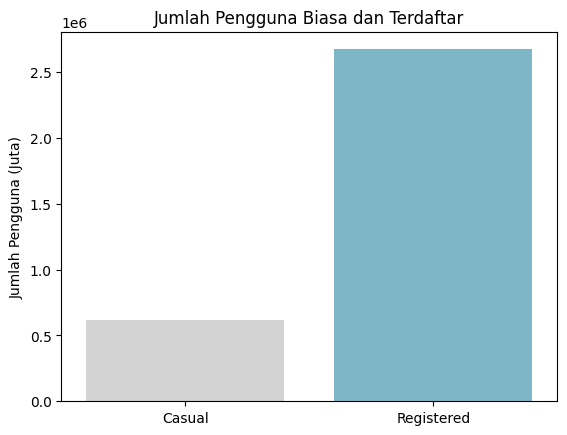

In [67]:
categories = ("Casual", "Registered")
users = (casual_users, registered_users)

sns.barplot(x=categories, y=users, palette=["#D3D3D3", "#72BCD4"])
plt.title("Jumlah Pengguna Biasa dan Terdaftar")
plt.ylabel("Jumlah Pengguna (Juta)")
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa jumlah pengguna terdaftar **lebih banyak** daripada pengguna biasa.

**Jumlah Pengguna berdasarkan Hari Libur dan Hari Kerja**

In [68]:
holidays = df.groupby(by="holiday").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False)

print(holidays)

             cnt
holiday         
False    3214244
True       78435


In [69]:
workingdays = df.groupby(by="workingday").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False)

print(workingdays)

                cnt
workingday         
True        2292410
False       1000269


<ipython-input-70-da635b9bf178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=workingdays, palette=["#D3D3D3", "#72BCD4"], ax=ax[0])
<ipython-input-70-da635b9bf178>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="holiday", y="cnt", data=holidays, palette=["#72BCD4", "#D3D3D3"], ax=ax[1])


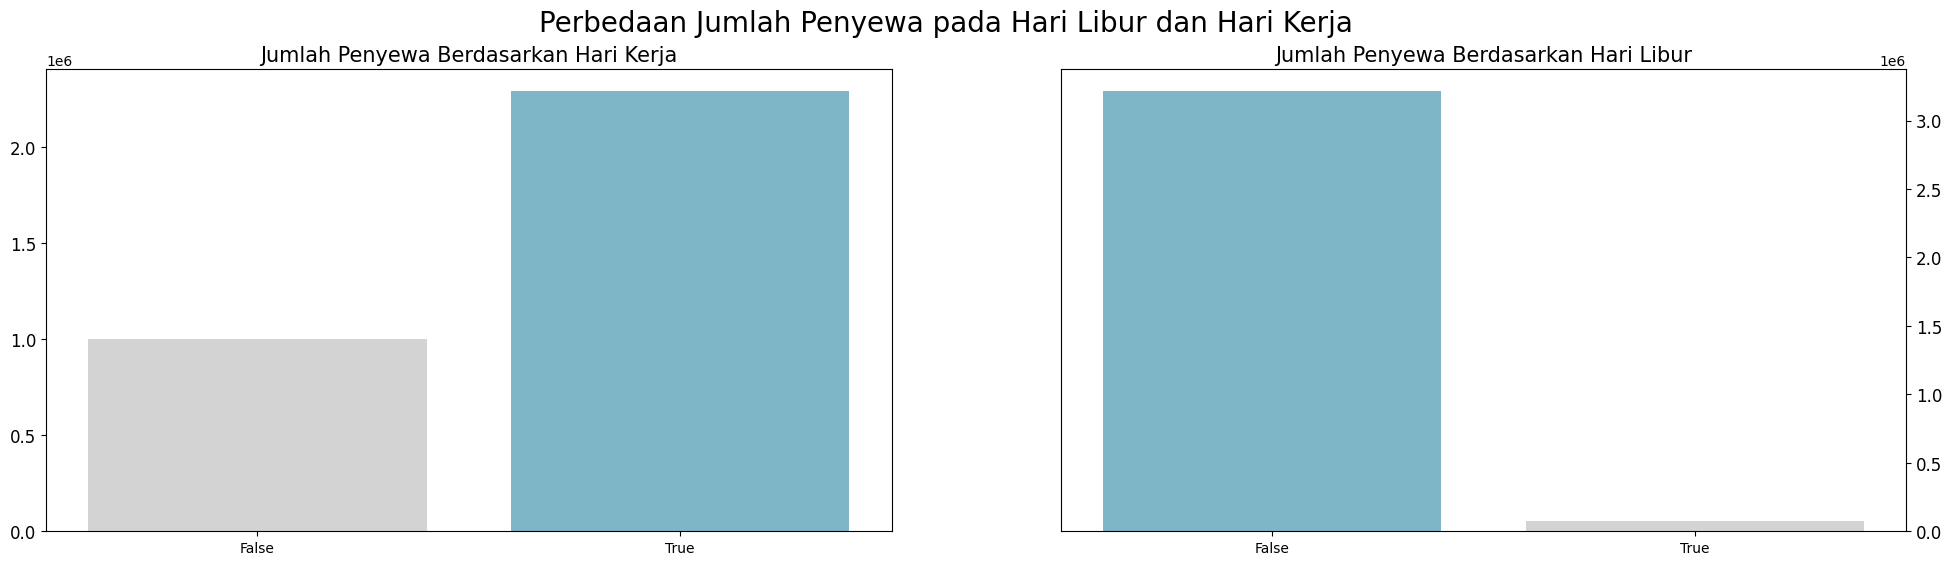

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="workingday", y="cnt", data=workingdays, palette=["#D3D3D3", "#72BCD4"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jumlah Penyewa Berdasarkan Hari Kerja", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="holiday", y="cnt", data=holidays, palette=["#72BCD4", "#D3D3D3"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah Penyewa Berdasarkan Hari Libur", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Perbedaan Jumlah Penyewa pada Hari Libur dan Hari Kerja", fontsize=20)
plt.show()

In [71]:
holiday_total = df["holiday"].sum()
workingday_total = df["workingday"].sum()
weekend_total = df["weekday"].count() - (holiday_total + workingday_total)

print("Jumlah hari libur: ", holiday_total)
print("Jumlah hari kerja: ", workingday_total)
print("Jumlah akhir pekan: ", weekend_total)

Jumlah hari libur:  21
Jumlah hari kerja:  500
Jumlah akhir pekan:  210


Dari pengelompokan tersebut, dapat dilihat bahwa jumlah pengguna pada hari kerja **lebih banyak** daripada hari libur. Hal ini normal terjadi karena jumlah hari kerja lebih banyak daripada hari libur.

In [72]:
workingdays_users = df.groupby(by="workingday").agg({"casual": "sum", "registered": "sum", "cnt": "sum"})

print(workingdays_users)

            casual  registered      cnt
workingday                             
False       316732      683537  1000269
True        303285     1989125  2292410


Berdasarkan pivot table di atas, dapat diketahui bahwa pada hari kerja, pengguna terdaftar **lebih banyak** menggunakan layanan Bike Sharing daripada pengguna biasa.

In [73]:
holidays_users = df.groupby(by="holiday").agg({"casual": "sum", "registered": "sum", "cnt": "sum"})

print(holidays_users)

         casual  registered      cnt
holiday                             
False    597658     2616586  3214244
True      22359       56076    78435


Pivot table di atas juga menunjukkan bahwa pengguna terdaftar juga **lebih banyak** menggunakan layanan Bike Sharing di hari libur daripada pengguna biasa.

**Menghitung Jumlah Pengguna berdasarkan waktu**

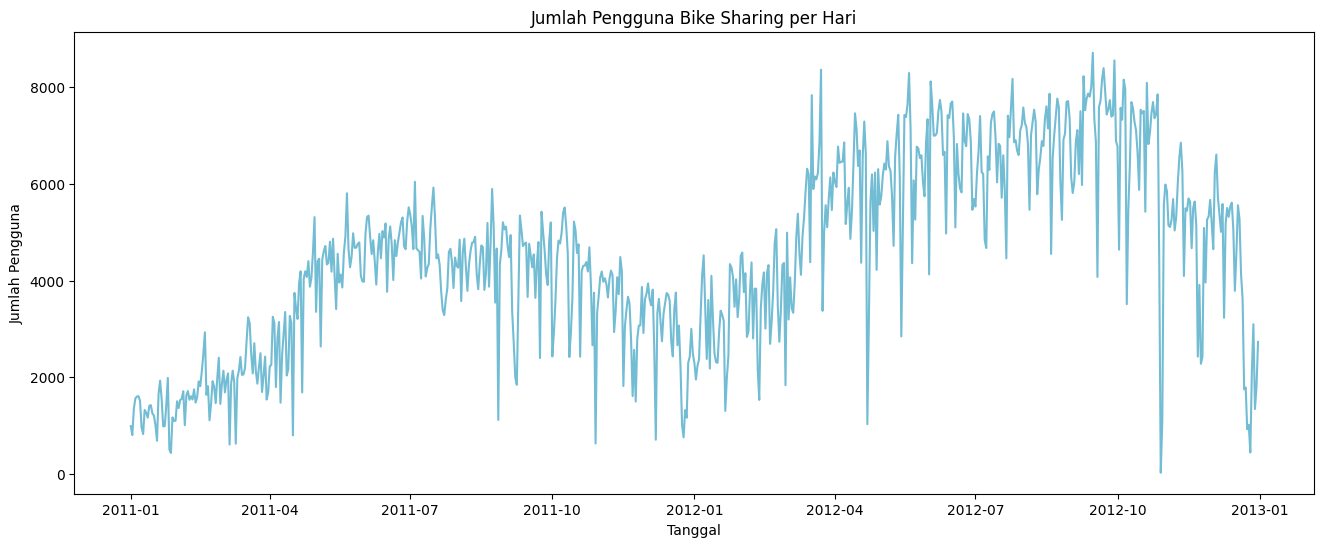

In [74]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=df, color="#72BCD4")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Pengguna Bike Sharing per Hari")
plt.show()

Dari chart tersebut, dapat dilihat bahwa jumlah pengguna mengalami **kenaikan** di pertengahan tahun dan mengalami **penurunan** di akhir tahun.

**Menghitung Jumlah Pengguna berdasarkan Season**

In [75]:
seasons_users = df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    })

print(seasons_users)

        casual  registered      cnt
season                             
Fall    226091      835038  1061129
Spring   60622      410726   471348
Summer  203522      715067   918589
Winter  129782      711831   841613


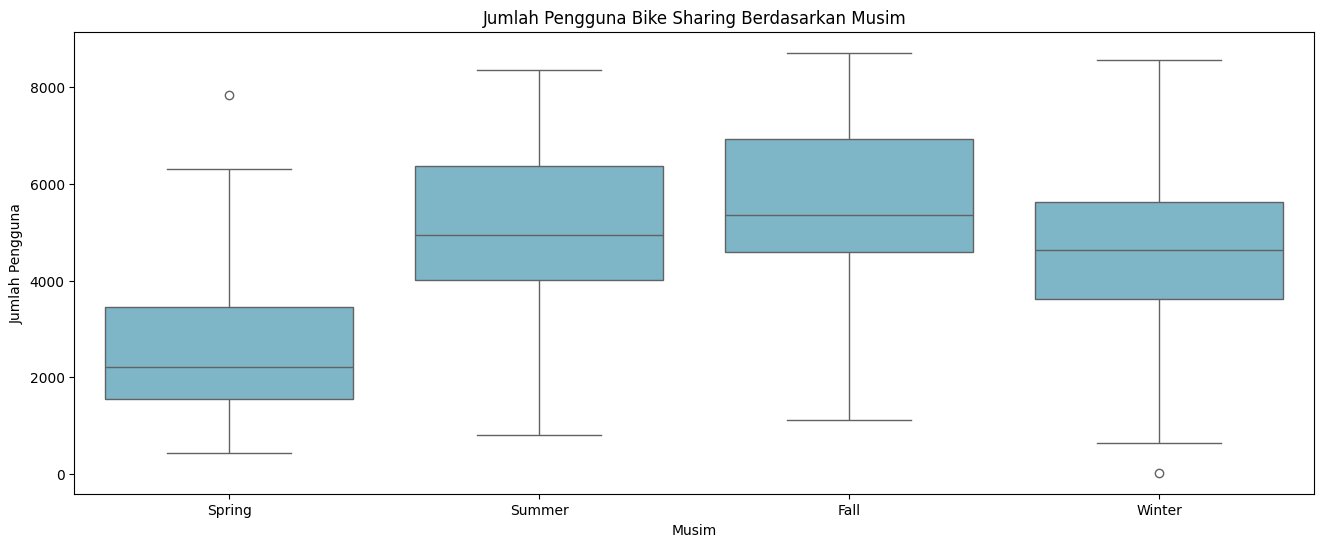

In [76]:
plt.figure(figsize=(16,6))

sns.boxplot(x="season", y="cnt", data=df, color="#72BCD4")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Pengguna Bike Sharing Berdasarkan Musim")
plt.show()

Dari data tersebut dapat diketahui bahwa pengguna layanan Bike Sharing paling sedikit pada musim semi dan paling banyak pada musim gugur.

**Menghitung Jumlah Pengguna berdasarkan Cuaca**

In [77]:
wheater_users = df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    })

print(wheater_users)

            casual  registered      cnt
weathersit                             
1           446346     1811606  2257952
2           169776      827082   996858
3             3895       33974    37869


Dari data tersebut dapat diketahui bahwa pengguna layanan Bike Sharing **paling banyak** pada cuaca yang cerah dan **paling sedikit** pada cuaca bersalju.

## **Visualization & Explanatory Analysis**

---



### **Pertanyaan 1: Bagaimana pola penyewaan sepeda antara hari kerja dan hari libur?**

**Jumlah Pengguna Layanan Bike Sharing Berdasarkan Kategori**

<ipython-input-78-23145ee238af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=users, palette=["#D3D3D3", "#72BCD4"])


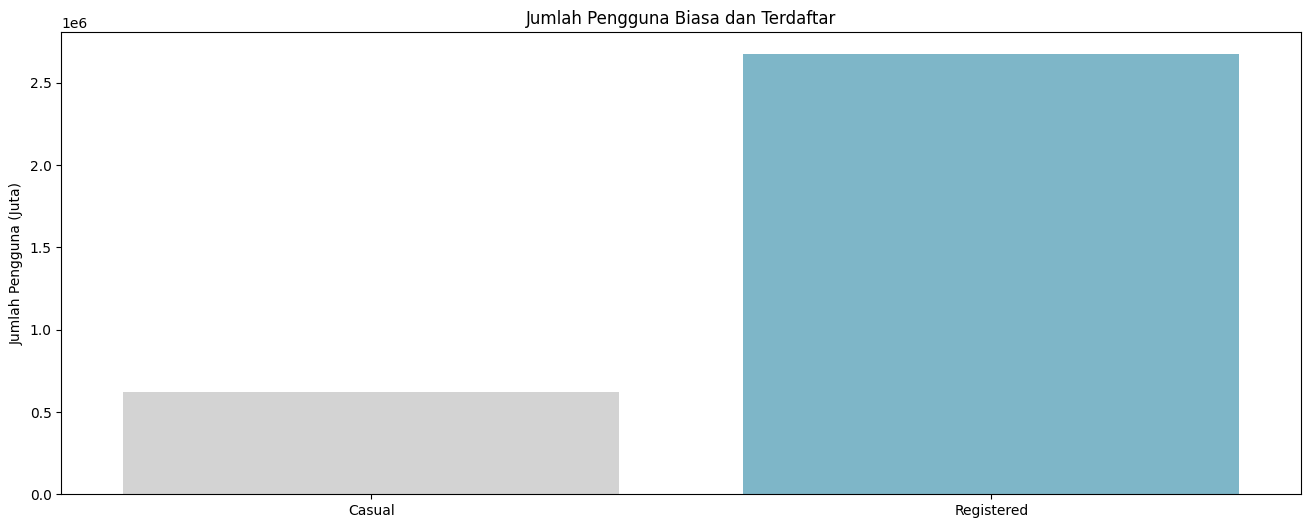

In [78]:
casual_users = df["casual"].sum()
registered_users = df["registered"].sum()

categories = ("Casual", "Registered")
users = (casual_users, registered_users)

plt.figure(figsize=(16,6))

sns.barplot(x=categories, y=users, palette=["#D3D3D3", "#72BCD4"])
plt.title("Jumlah Pengguna Biasa dan Terdaftar")
plt.ylabel("Jumlah Pengguna (Juta)")
plt.show()

**Jumlah Hari pada Dataset**

<ipython-input-79-5e8148994df0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days_cat, y=days_count, palette=["#D3D3D3", "#72BCD4"])
<ipython-input-79-5e8148994df0>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=days_cat, y=days_count, palette=["#D3D3D3", "#72BCD4"])


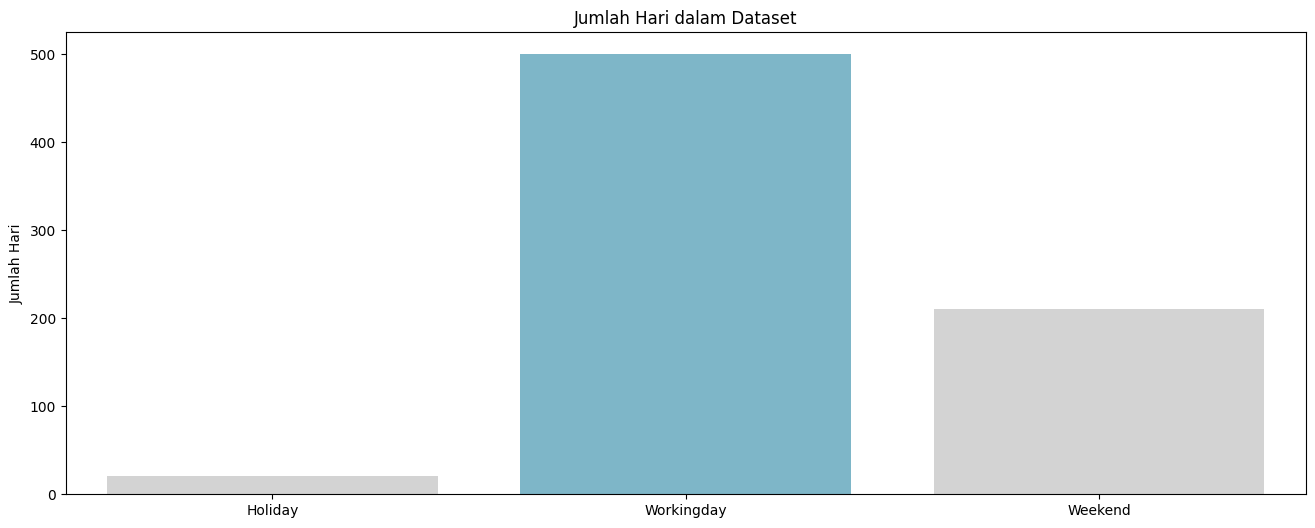

In [79]:
holiday_total = df["holiday"].sum()
workingday_total = df["workingday"].sum()
weekend_total = df["weekday"].count() - (holiday_total + workingday_total)

days_cat = ("Holiday", "Workingday", "Weekend")
days_count = (holiday_total, workingday_total, weekend_total)

plt.figure(figsize=(16,6))

sns.barplot(x=days_cat, y=days_count, palette=["#D3D3D3", "#72BCD4"])
plt.title("Jumlah Hari dalam Dataset")
plt.ylabel("Jumlah Hari")
plt.show()

**Pengguna Layanan Bike Sharing pada Hari Kerja**

In [80]:
workingdays_users = df.groupby(by="workingday").agg({"casual": "sum", "registered": "sum", "cnt": "sum"})

print(workingdays_users)

            casual  registered      cnt
workingday                             
False       316732      683537  1000269
True        303285     1989125  2292410


In [81]:
workingday_users = workingdays_users.reset_index()

In [82]:
workingday_users

,workingday,casual,registered,cnt
0,False,316732,683537,1000269
1,True,303285,1989125,2292410


In [83]:
workingday_users['workingday'] = workingday_users['workingday'].replace({False: 'Hari Libur', True: 'Hari Kerja'})

workingday_users_nopivot = pd.melt(workingday_users,
                           id_vars=["workingday"],
                           value_vars=["casual", "registered"],
                           var_name="categories",
                           value_name="cnt")

<ipython-input-83-b16dafccbf85>:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  workingday_users_nopivot = pd.melt(workingday_users,


In [84]:
workingday_users_nopivot

,workingday,categories,cnt
0,Hari Libur,casual,316732
1,Hari Kerja,casual,303285
2,Hari Libur,registered,683537
3,Hari Kerja,registered,1989125


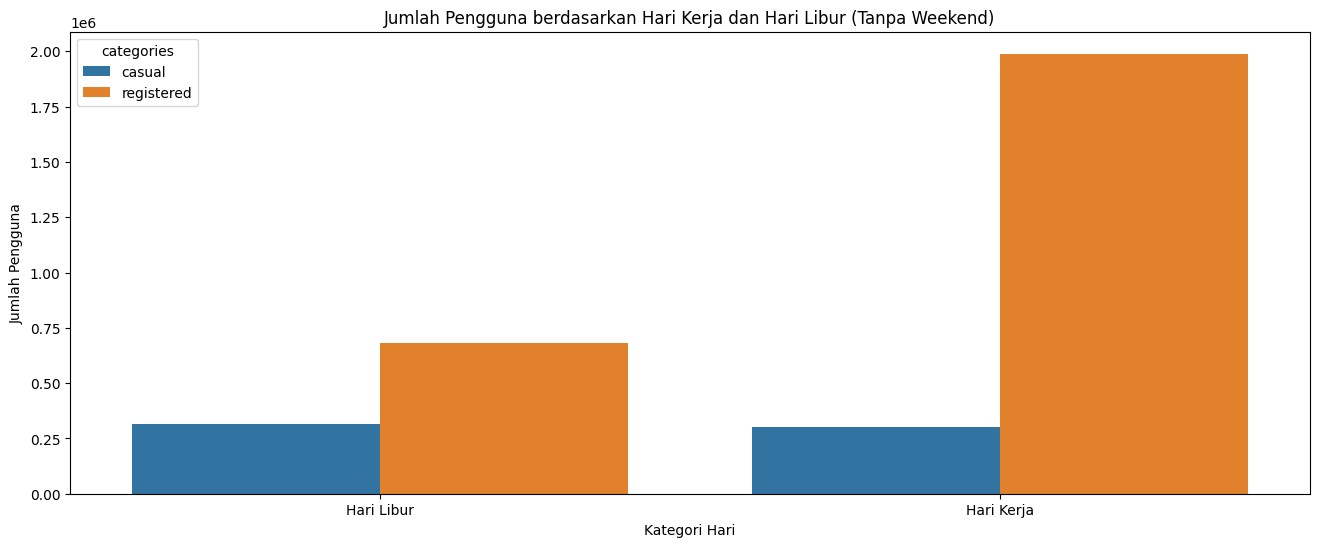

In [85]:
plt.figure(figsize=(16,6))

sns.barplot(x="workingday", y="cnt", data=workingday_users_nopivot, hue="categories")
plt.title("Jumlah Pengguna berdasarkan Hari Kerja dan Hari Libur (Tanpa Weekend)")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Pengguna")
plt.show()

### **Insight** ✨
*   Jumlah pengguna terdaftar lebih banyak dibandingkan pengguna biasa
*   Terdapat lebih banyak hari kerja daripada hari libur dan akhir pekan
*  Pengguna terdaftar secara dominan memanfaatkan layanan Bike Sharing, baik pada hari kerja maupun hari libur



### **Pertanyaan 2: Bagaimana musim memengaruhi penyewaan sepeda?**

**Jumlah Pengguna Bike Sharing per Hari**

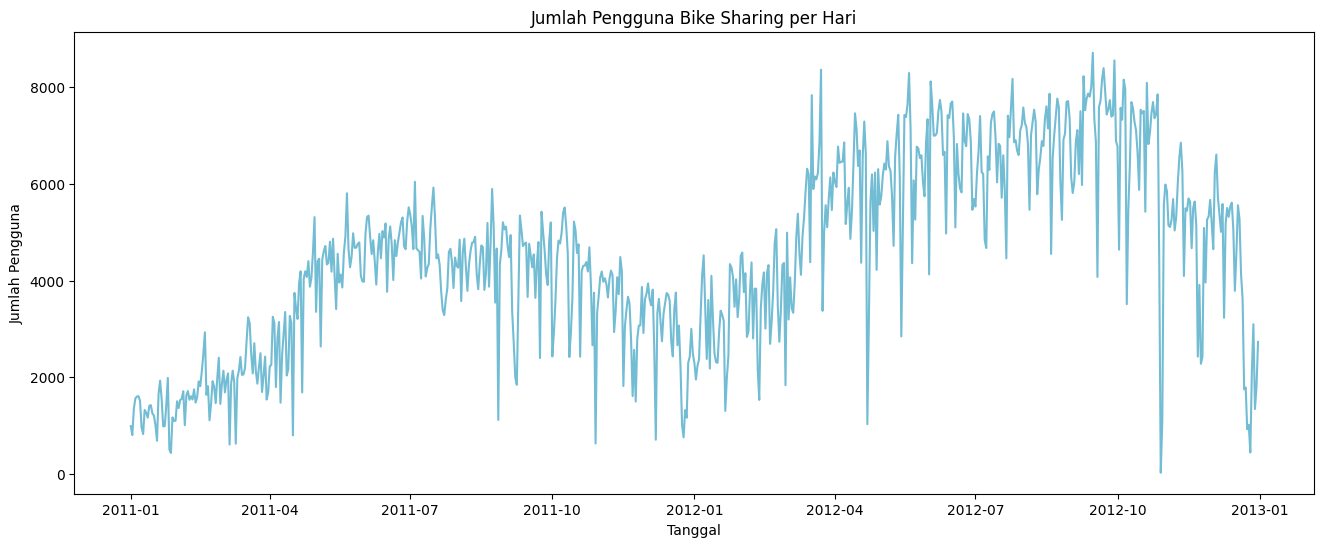

In [86]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=df, color="#72BCD4")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Pengguna Bike Sharing per Hari")
plt.show()

**Jumlah Pengguna berdasarkan Musim**

Pada tahap ini digunakan teknik *Seasonal Comparison Analysis* yang melibatkan perbandingan jumlah pengguna layanan Bike Sharing antar musim yang berbeda.

In [87]:
seasons_users = df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    })

print(seasons_users)

        casual  registered      cnt
season                             
Fall    226091      835038  1061129
Spring   60622      410726   471348
Summer  203522      715067   918589
Winter  129782      711831   841613


In [88]:
season_users = seasons_users.reset_index()

In [89]:
season_users

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


In [90]:
season_users_nopivot = pd.melt(season_users,
                           id_vars=["season"],
                           value_vars=["casual", "registered"],
                           var_name="categories",
                           value_name="cnt")

season_users_nopivot

<ipython-input-90-c197f96bab08>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  season_users_nopivot = pd.melt(season_users,


,season,categories,cnt
0,Fall,casual,226091
1,Spring,casual,60622
2,Summer,casual,203522
3,Winter,casual,129782
4,Fall,registered,835038
5,Spring,registered,410726
6,Summer,registered,715067
7,Winter,registered,711831


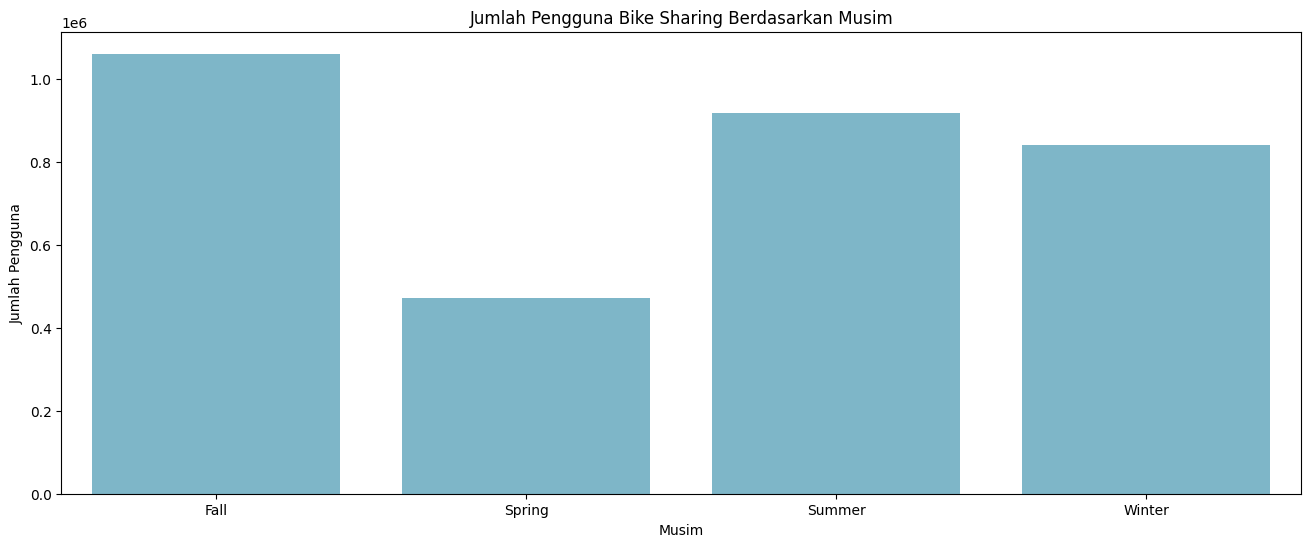

In [91]:
plt.figure(figsize=(16,6))

sns.barplot(x="season", y="cnt", data=season_users, color="#72BCD4")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Pengguna Bike Sharing Berdasarkan Musim")
plt.show()

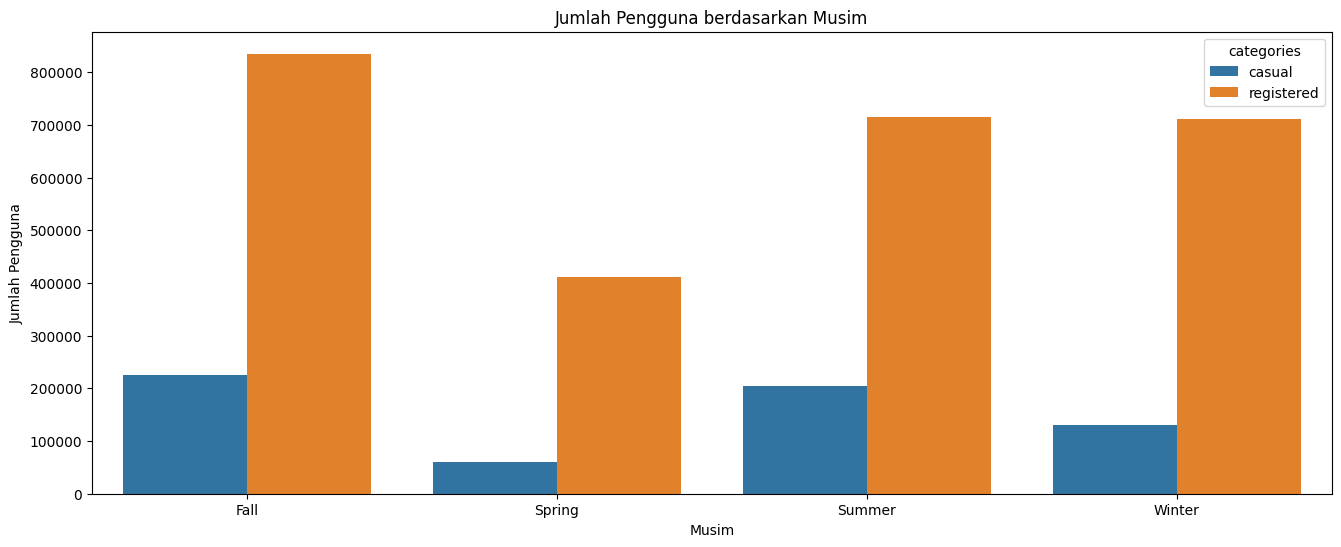

In [92]:
plt.figure(figsize=(16,6))

sns.barplot(x="season", y="cnt", data=season_users_nopivot, hue="categories")
plt.title("Jumlah Pengguna berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.show()

**Jumlah Pengguna berdasarkan Cuaca**

In [93]:
wheater_users = df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    })

print(wheater_users)

            casual  registered      cnt
weathersit                             
1           446346     1811606  2257952
2           169776      827082   996858
3             3895       33974    37869


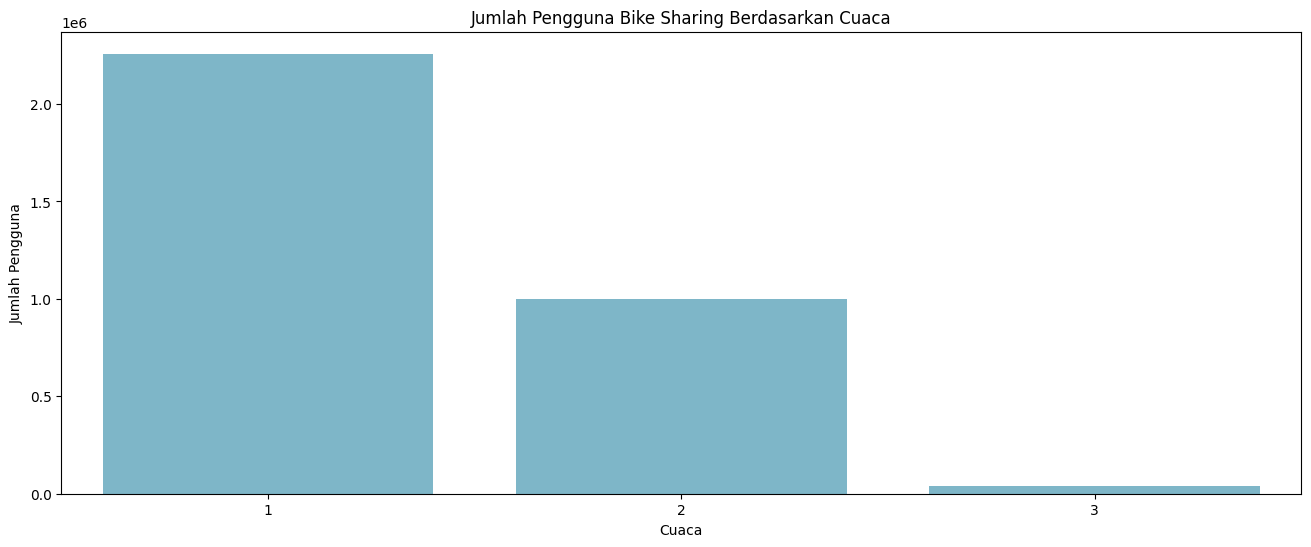

In [94]:
plt.figure(figsize=(16,6))

sns.barplot(x="weathersit", y="cnt", data=wheater_users, color="#72BCD4")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Pengguna Bike Sharing Berdasarkan Cuaca")
plt.show()

**Catatan** 📔<br>
1. Cerah, Sedikit awan, Berawan sebagian
2. Kabut + Berawan, Kabut + Broken clouds, Kabut + Sedikit awan, Kabut
3. Salju Ringan, Hujan Ringan + Badai Petir + Scattered clouds, Hujan Ringan + Scattered clouds
4. Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut

###**Insigth**✨
*   Terdapat kenaikan jumlah pengguna layanan Bike Sharing di pertengahan tahun
*   Cenderung terjadi penurunan jumlah pengguna di akhir dan awal tahun
*   Pengguna layanan Bike Sharing paling sedikit pada musim semi dan paling banyak pada musim gugur
*  Pengguna terdaftar secara dominan memanfaatkan layanan Bike Sharing di setiap musim
*   Pengguna layanan Bike Sharing paling banyak pada cuaca yang cerah dan paling sedikit pada cuaca bersalju





## **Conclusion**

---



1.  **Kesimpulan pertanyaan 1**:   Bagaimana pola penyewaan sepeda antara hari kerja dan hari libur?

> Adanya kecenderungan jumlah hari kerja yang lebih banyak daripada hari libur dan akhir pekan, menunjukkan bahwa layanan Bike Sharing lebih sering digunakan pada hari-hari kerja. Analisis data menunjukkan bahwa pengguna terdaftar secara konsisten lebih sering menggunakan layanan Bike Sharing dibandingkan pengguna biasa, baik pada hari kerja maupun hari libur.



2.   **Kesimpulan pertanyaan 2**: Bagaimana musim memengaruhi penyewaan sepeda?

> Dari hasil analisis data, terlihat adanya kenaikan jumlah pengguna di pertengahan tahun, yang mungkin terkait dengan musim yang lebih hangat dan kondisi cuaca yang lebih menyenangkan. Di sisi lain, terlihat adanya penurunan pengguna layanan Bike Sharing pada awal dan akhir tahun yang kemungkinan disebabkan oleh cuaca yang lebih dingin dan kurang menguntungkan. Hal ini divalidasi dengan data musim semi yang memiliki jumlah pengguna paling sedikit dan musim gugur yang memiliki jumlah pengguna lebih banyak. Ditambah dengan data cuaca cerah dengan pengguna paling banyak dan cuaca bersalju dengan pengguna paling sedikit.

